In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score

In [3]:
data = load_wine()

In [5]:
x = data.data
y = data.target

In [26]:
RFC = RandomForestClassifier(random_state=1, n_estimators=100)
score = cross_val_score(RFC, x, y, cv=10).mean()
print(score)


0.9833333333333334


# oob_score (out of bag data)

In [49]:
rfc = RandomForestClassifier(random_state=1, n_estimators=100, oob_score=True)
rfc.fit(x, y)
print(rfc.oob_score_)
pd.concat([pd.DataFrame(data.feature_names, columns=['feature']),pd.DataFrame(rfc.feature_importances_, columns=['feature importance'])], axis=1)
#不分訓練集和測試集，利用沒取到的袋外數據測試模型

0.9831460674157303


,feature,feature importance
0,alcohol,0.146294
1,malic_acid,0.019838
2,ash,0.012625
3,alcalinity_of_ash,0.022348
4,magnesium,0.032354
5,total_phenols,0.041013
6,flavanoids,0.164055
7,nonflavanoid_phenols,0.010068
8,proanthocyanins,0.021885
9,color_intensity,0.135429


# 學習曲線

In [20]:
score = []
for i in range(1, 200, 10):
    rfc = RandomForestClassifier(random_state=1, n_estimators=i)
    rfc_s = cross_val_score(rfc, x, y, cv=10).mean()
    score.append(rfc_s)
print(max(score), 10*score.index(max(score))+1)

0.9888888888888889 121


In [21]:
score.index(max(score))

12

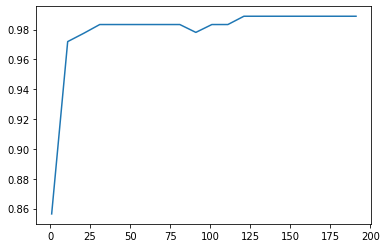

In [22]:
plt.plot(range(1,200,10), score)
plt.show()

In [39]:
pd.concat?